<a href="https://colab.research.google.com/github/molabokchi/bokchi_open_lab/blob/main/deepdriver_comm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 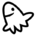 deepdriver quickstart!

welecome to deepdriver! 😀

You can refer to the guide document.
https://bokchi.gitbook.io/deepdriver-ce/

# 0. 💻 install deepdriver

In [ ]:
pip install deepdriver==0.11.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#1. ➕ import deepdriver



In [ ]:
import deepdriver

#2. ⚙ deepdriver server setting

In [ ]:
deepdriver.setting(http_host="54.180.86.146:9011" ,grpc_host="54.180.86.146:19051")

#3. 🔌 log in to deepdriver

In [ ]:
deepdriver.login(key="ZmIyNWQxNGJkMzUxYTVjODQ2NjM5NTgzOTM0YTM2OGE2ZmJiY2M2MWMwOWQ0OWFkNjU2YzNkM2UxMjA0YTVkZg==")

#4. 🥼 create experiment and run

In [ ]:
epoch =10

In [ ]:
def make_exp_name():
  import socket
  from datetime import datetime
  host_name = socket.gethostname()
  date = datetime.today().strftime("%Y%m%d") 

  return "exp" + "_" +host_name +"_"+date

In [ ]:
# experiment init & config hyperparam
deepdriver.init(exp_name= make_exp_name(), 
                config={ 'architecture':"CNN", 'epoch': epoch, 'batch_size': 32, 'hidden_layer':128, 'learning_rate':0.01})

#5. 📚 train your code and send log

In [ ]:
import random
accuracy = [ random.uniform(0.7+0.02*i, 1)  for i in range(epoch)]
train_loss = [ random.uniform(0.1,  0.2-0.01*i)  for i in range(epoch)]
val_accuracy =[ random.uniform(0.7+0.02*i, 1)  for i in range(epoch)]
val_loss = [ random.uniform(0.2,  0.3-0.01*i)  for i in range(epoch)]

In [ ]:
for i in range(epoch):
    # send train log
    deepdriver.log({'acc': accuracy[i], 'loss': train_loss[i], 'val_acc': val_accuracy[i],'val_loss': val_loss[i]})

#6. ⬆ upload artifact(data)

In [ ]:
arti = deepdriver.Artifacts(name="sample",type="dataset")

In [ ]:
arti.add("/content/sample_data")

In [ ]:
[ent.path for ent  in arti.entry_list]

In [ ]:
deepdriver.upload_artifact(arti)

#7. ⬇ download artifact(data)

In [ ]:
arti2 = deepdriver.get_artifact(name="sample",type="dataset")

In [ ]:
arti2.download()

#8. 📊 visualize train result

In [ ]:
df =deepdriver.DataFrame(columns=["step","acc"], data=[ [idx, acc] for idx, acc in enumerate(accuracy)])

In [ ]:
line =deepdriver.line(df,"step","acc")

In [ ]:
deepdriver.visualize(line)

In [ ]:
df =deepdriver.DataFrame(columns=["step","loss"], data=[ [idx, loss] for idx, loss in enumerate(train_loss)])

In [ ]:
line =deepdriver.line(df,"step","loss")

In [ ]:
deepdriver.visualize(line)

In [ ]:
df =deepdriver.DataFrame(columns=["step","acc"], data=[ [idx, acc] for idx, acc in enumerate(accuracy)])

In [ ]:
historgram = deepdriver.histogram(df,"step","acc")

In [ ]:
deepdriver.visualize(historgram)

In [ ]:
scatter = deepdriver.scatter(df,"step","acc")

In [ ]:
deepdriver.visualize(scatter)

In [ ]:
# table test
df =deepdriver.DataFrame(columns=["step","acc"], data=[ [idx, acc] for idx, acc in enumerate(accuracy)])
table =deepdriver.Table(df)


In [ ]:
deepdriver.visualize(table)

In [ ]:
# confusion matrix test
y_true = [0, 1, 0, 1, 0]  # 실제값
preds = [0, 1, 0, 1, 1]  # 예측값
labels = ["cat", "dog"]
confusion_matrix = deepdriver.confusion_matrix(probs=None, y_true=y_true,
                                                      preds=preds, class_names=labels,
                                                      title="my_confusion_matrix")


In [ ]:
deepdriver.visualize(confusion_matrix)

In [ ]:
# roc curve test
y_true = [1, 0, 0, 1, 1, 0, 1, 0, 1]
probs = [[0.1, 0.9], [0.9, 0.1], [0.75, 0.25], [0.6, 0.4], [0.3, 0.7], [0.6, 0.4], [0.7, 0.3], [0.5, 0.5],
          [0.8, 0.2]]
labels = ["cat", "dog"]
curve = deepdriver.roc_curve(probs=probs, y_true=y_true, class_names=labels, title="my_roc_curve")

In [ ]:
deepdriver.visualize(curve)

In [ ]:
# bar chart
import numpy as np
import pandas as pd
# creating random data through randomint
# function of numpy.random
np.random.seed(42)
   
random_x= np.random.randint(1, 101, 100)
random_y= np.random.randint(1, 101, 100)
dataframe =pd.DataFrame({"x": random_x,"y":random_y})
df= deepdriver.DataFrame(dataframe=dataframe)
bar = deepdriver.bar(df, x="x" ,y ="y", title= "what a great bar plot")

In [ ]:
deepdriver.visualize(bar)

#9. 📈 send log for chart & table

In [ ]:
df =deepdriver.DataFrame(columns=["step","loss"], data=[ [idx, loss] for idx, loss in enumerate(train_loss)])
line =deepdriver.line(df,"step","loss")
deepdriver.log({"my_line_chart":line})

In [ ]:
df =deepdriver.DataFrame(columns=["step","acc"], data=[ [idx, acc] for idx, acc in enumerate(accuracy)])
historgram = deepdriver.histogram(df,"step","acc")
deepdriver.log({"my_histogram_chart":historgram})

In [ ]:
df =deepdriver.DataFrame(columns=["step","acc"], data=[ [idx, acc] for idx, acc in enumerate(accuracy)])
scatter = deepdriver.scatter(df,"step","acc")
deepdriver.log({"my_scatter_chart":scatter})

In [ ]:
df =deepdriver.DataFrame(columns=["step","acc"], data=[ [idx, acc] for idx, acc in enumerate(accuracy)])
table =deepdriver.Table(df)
deepdriver.log({"my_table":table})

In [ ]:
!curl -o dog.jpg https://mblogthumb-phinf.pstatic.net/MjAyMjAyMDdfMjEy/MDAxNjQ0MTk0Mzk2MzY3.WAeeVCu2V3vqEz_98aWMOjK2RUKI_yHYbuZxrokf-0Ug.sV3LNWlROCJTkeS14PMu2UBl5zTkwK70aKX8B1w2oKQg.JPEG.41minit/1643900851960.jpg?type=w800

In [ ]:
from deepdriver.sdk.data_types.boundingBoxes import BoundingBoxes
json_info = {
    "predictions": {
        "box_data": [
            {
                "position": {
                    "minX": 0.1,
                    "maxX": 0.2,
                    "minY": 0.3,
                    "maxY": 0.4
                },
                "class_id": 1,
                "caption": "road",
                "scores": {
                    "acc": 0.2,
                    "loss": 1.2
                }
            },
            {
                "position": {
                    "minX": 100,
                    "maxX": 150,
                    "minY": 300,
                    "maxY": 350
                },
                "unit": "pixel",
                "class_id": 3,
                "caption": "a building",
                "scores": {
                    "acc": 0.5,
                    "loss": 0.7
                }
            }
        ],
        "class_labels": {
            "0": "person",
            "1": "car",
            "2": "road",
            "3": "building"
        }
    }
}
bb = BoundingBoxes(
    key=list(json_info.keys())[0],
    box_data=list(json_info.values())[0]['box_data'],
    class_labels=list(json_info.values())[0]['class_labels'])
img = deepdriver.Image("dog.jpg", boxes=bb)

img.to_json("test_key")
deepdriver.log({"my_image":img})


In [ ]:
# confusion matrix test
y_true= []
preds= []
n=100
for _ in range(n):
  k = random.randint(0, 1) # decide on a k each time the loop runs
  y_true.append(k)
for _ in range(n):
  k = random.randint(0, 1) # decide on a k each time the loop runs
  preds.append(k)
# y_true = [0, 1, 0, 1, 0]  # 실제값
# preds = [0, 1, 0, 1, 1]  # 예측값
labels = ["cat", "dog"]
confusion_matrix = deepdriver.confusion_matrix(probs=None, y_true=y_true,
                                                      preds=preds, class_names=labels,
                                                      title="my_confusion_matrix")
deepdriver.visualize(confusion_matrix)
deepdriver.log({"confusion_matrix": confusion_matrix, "a": "b"})

In [ ]:
# roc curve test
n=100
y_true= []
for _ in range(n):
  k = random.randint(0, 1)
  y_true.append(k)
#y_true = [1, 0, 0, 1, 1, 0, 1, 0, 1]

probs= []
for i in range(len(y_true)):
  r =random.uniform(0, 1)
  probs.append([r,1-r])
# probs = [[0.9, 0.1], [0.1, 0.9], [0.75, 0.25], [0.4, 0.6], [0.3, 0.7], [0.6, 0.4], [0.7, 0.3], [0.5, 0.5],
#           [0.8, 0.2]]
labels = ["cat", "dog"]
curve = deepdriver.roc_curve(probs=probs, y_true=y_true, class_names=labels, title="my_roc_curve")
deepdriver.visualize(curve)
deepdriver.log({"roc_curve": curve})

In [ ]:
# bar chart
import numpy as np
import pandas as pd
# creating random data through randomint
# function of numpy.random
np.random.seed(42)
   
random_x= np.random.randint(1, 101, 100)
random_y= np.random.randint(1, 101, 100)
dataframe =pd.DataFrame({"x": random_x,"y":random_y})
df= deepdriver.DataFrame(dataframe=dataframe)
bar = deepdriver.bar(df, x="x" ,y ="y", title= "what a great bar plot")
deepdriver.log({"my bar chart": bar})

# 10. upload Artifact for chart & table

In [ ]:
df =deepdriver.DataFrame(columns=["step","loss"], data=[ [idx, loss] for idx, loss in enumerate(train_loss)])
line =deepdriver.line(df,"step","loss")
arti = deepdriver.Artifacts(name="my_line_chart", type="result")
arti.add(line, "my_line_chart")
deepdriver.upload_artifact(arti)

#11. 🔚 finish run

In [ ]:
# finish experiment
deepdriver.finish()